#Online Fraud Detection

##Import necesary libraries

In [1]:
## Data loading, processing and for more
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# set seaborn style because it prettier
sns.set()

##Model creation
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.inspection import partial_dependence

##Classifiers
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

In [3]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Setting toolkit folder as working directory

%cd /content/drive/MyDrive/InSaid_project
! ls

/content/drive/MyDrive/InSaid_project
Fraud.csv


##Exploratory Data Analysis

In [5]:
df = pd.read_csv("Fraud.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
df.shape

(6362620, 11)

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df_corr=df.corr()
df_corr

<ipython-input-11-fe1f1278251a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [12]:
df_corr['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [13]:
df_type=df["type"].value_counts()
df_type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
df_mean = df.groupby("type")['amount', 'isFraud'].mean()
print("Mean values per category",df_mean)

<ipython-input-14-9927b56a40e4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df.groupby("type")['amount', 'isFraud'].mean()


Mean values per category                  amount   isFraud
type                             
CASH_IN   168920.242004  0.000000
CASH_OUT  176273.964346  0.001840
DEBIT       5483.665314  0.000000
PAYMENT    13057.604660  0.000000
TRANSFER  910647.009645  0.007688


##Data Visualization

In [15]:
transaction = df_type.index
quantity = df_type.values
px.pie(df, values=quantity, names=transaction, hole=0.4, title="Transaction Type Count")

Cash out and payment are the most common type of transactions.

<Axes: xlabel='type', ylabel='amount'>

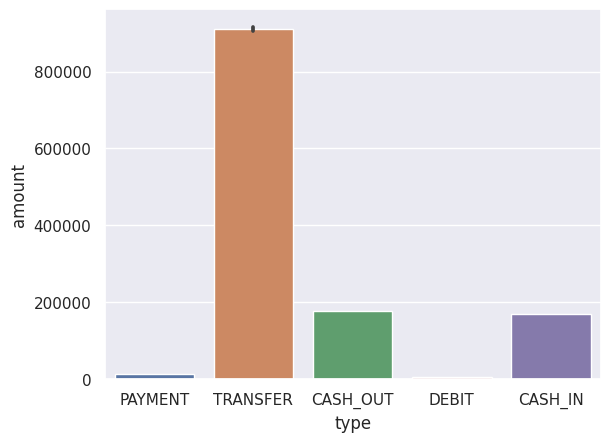

In [16]:
sns.barplot(x='type',y='amount',data=df)

'transfer' type has the maximum amount of money being transfered to the recipient.

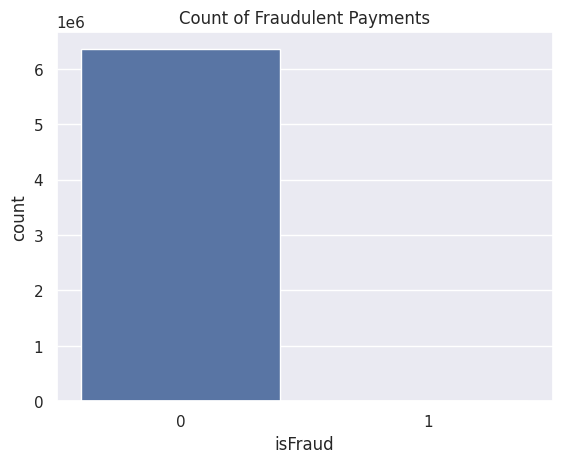

0    6354407
1       8213
Name: isFraud, dtype: int64


In [17]:
#create two dataframe with fraud and non-fraud data
df_fraud = df.loc[df.isFraud==1]
df_non_fraud = df.loc[df.isFraud==0]

sns.countplot(x="isFraud", data=df)
plt.title("Count of Fraudulent Payments")
plt.show()
'''print("Number of Fraudulent Payments:", df_froud.isFraud.count())
print("Number of Non Fraudulent Payments:", df_non_froud.isFraud.count())'''
print(df.isFraud.value_counts()) #


<function matplotlib.pyplot.show(close=None, block=None)>

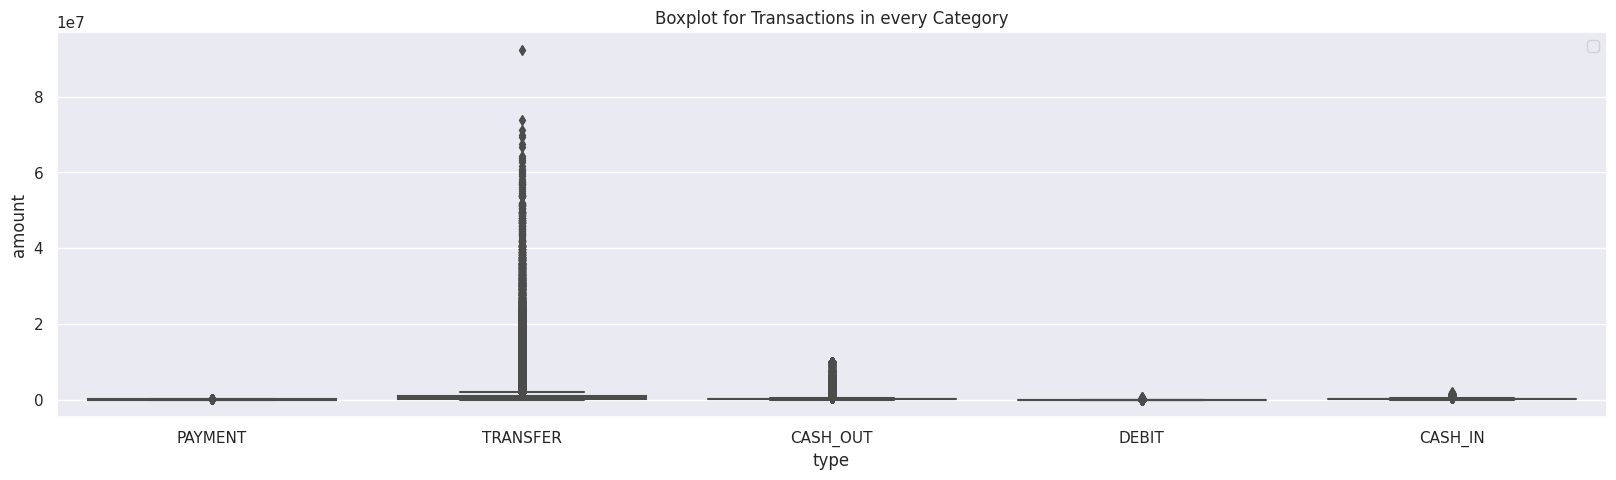

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df.type, y=df.amount)
plt.title("Boxplot for Transactions in every Category")
plt.legend()
plt.show

<ipython-input-19-b1973f4cc9b7>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-19-b1973f4cc9b7>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




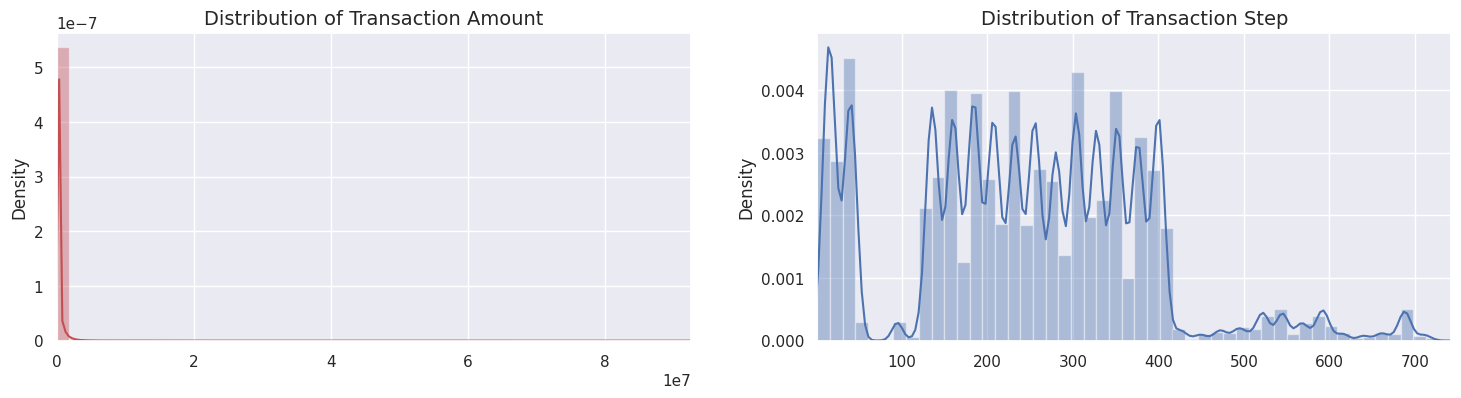

In [19]:
# Plotting subplot for amount and time column
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['amount'].values
time_val = df['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

The above graph indicates the distribution of the step column.

##Model Creation

###Decision Tree Classifier

Variable selection using Panda DataFrame

In [20]:
df['type']=df['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})
df['isFraud']=df['isFraud'].map({0:'no_fraud', 1:'fraud'})

In [21]:
X = np.array(df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(df[['isFraud']])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [22]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [25]:
model.score(X_test, y_test)

0.9996919508001421

In [26]:
df.sample(n=3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4480903,324,1,11852.02,C1390726154,0.00,0.00,C1368044293,5353430.46,5365282.47,no_fraud,0
1305463,136,3,348534.85,C1503059123,2749987.75,3098522.61,C1661029237,1244729.80,896194.95,no_fraud,0
5176714,359,3,94796.71,C1499137974,9055432.84,9150229.55,C426566088,3826730.31,3731933.59,no_fraud,0


In [27]:
data_pred = np.array([[2,2945.44, 368360.0, 365414.56]])
model.predict(data_pred)

array(['no_fraud'], dtype=object)

In [28]:
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,fraud,0
6362619,743,1,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,fraud,0


In [29]:
data_pred2 = np.array([[4,6311409.28, 6311409.28, 0.0]])
model.predict(data_pred2)

array(['fraud'], dtype=object)

###Measuring Model Performance

In [30]:
# Make predictions on test set
y_pred = model.predict(X_test)

In [31]:
# Convert to pandas dataframe
y_test_df = pd.DataFrame(y_test, columns=['target'])
y_pred_df = pd.DataFrame(y_pred, columns=['target'])

In [32]:
# Define label mapping
label_map = {'no_fraud': 0, 'fraud': 1}

# Use map on dataframes
y_test_encoded = y_test_df['target'].map(label_map)
y_pred_encoded = y_pred_df['target'].map(label_map)

Using AUC-ROC, precision, recall, F1-score.confusion matrix on test set and curves like ROC, precision-recall curve to measure the perfromance

In [33]:
# Calculate AUC

auc = roc_auc_score(y_test_encoded, y_pred_encoded)

# Calculate metrics
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_pred_encoded)

# Find threshold that maximizes F1 score
f1 = 2 * (precision * recall) / (precision + recall)
ix = np.argmax(f1)
best_thresh = thresholds[ix]

# Apply threshold to predictions
y_pred_thresh = (y_pred_encoded > best_thresh).astype(int)

# Evaluate with new threshold

print('Precision:', precision_score(y_test_encoded, y_pred_thresh, zero_division=1))
print('Recall:', recall_score(y_test_encoded, y_pred_thresh, zero_division=1))

cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test_encoded, y_pred_encoded)
print('Classification Report:\n', cr)

Precision: 1.0
Recall: 0.0
Confusion Matrix:
 [[1270704     166]
 [    226    1428]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270870
           1       0.90      0.86      0.88      1654

    accuracy                           1.00   1272524
   macro avg       0.95      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



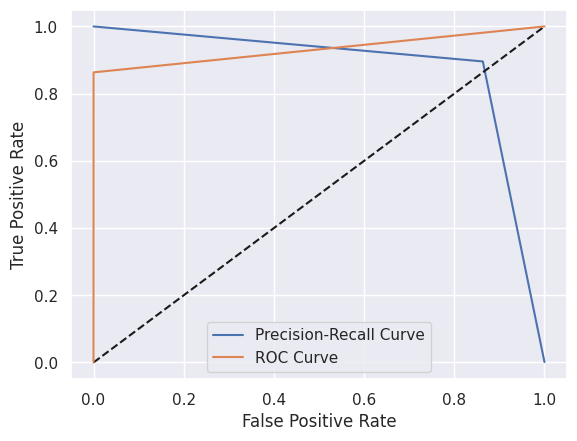

In [34]:
# Plot curves
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Using graph to visualize AUC-ROC, precision, recall, F1-score for Decision Tree Classifier

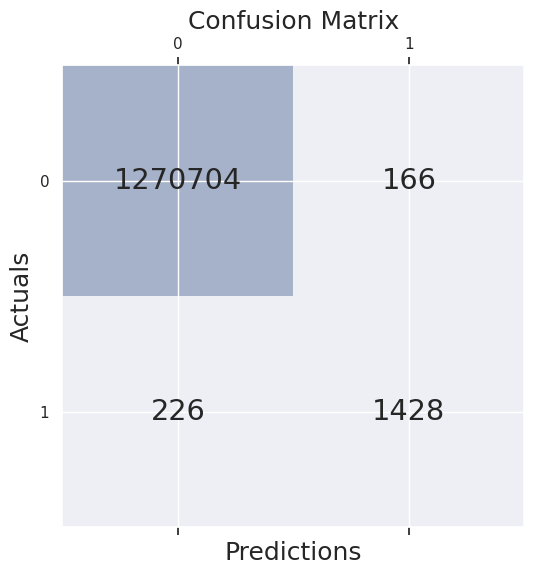

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Confusion matirx graph for Decision Tree Classifier

Text(0, 0.5, 'Importance')

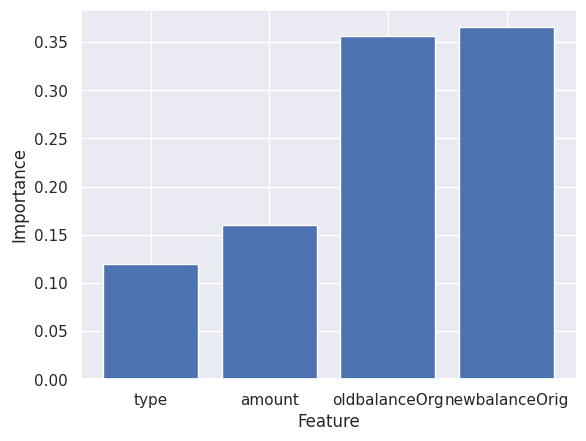

In [37]:
# Get feature importances
importances = model.feature_importances_

# Get columns from df
columns = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].columns

# Plot importances
plt.bar(columns, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')


The Graph shows the Key Features which are important for predicting fraudulent customers

###Logistic Regression model creation

In [38]:
model = LogisticRegressionCV()

In [39]:
model.fit(X_resampled, y_resampled)

LogisticRegressionCV()

In [40]:
model.score(X_test, y_test)

0.9280485083189001

In [41]:
y_pred = model.predict(X_test)

In [42]:
# Convert to pandas dataframe
y_test_df = pd.DataFrame(y_test, columns=['target'])
y_pred_df = pd.DataFrame(y_pred, columns=['target'])

In [43]:
# Define label mapping
label_map = {'no_fraud': 0, 'fraud': 1}

# Use map on dataframes
y_test_encoded = y_test_df['target'].map(label_map)
y_pred_encoded = y_pred_df['target'].map(label_map)

In [44]:
# Calculate AUC

auc = roc_auc_score(y_test_encoded, y_pred_encoded)

# Calculate metrics
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_pred_encoded)

# Find threshold that maximizes F1 score
f1 = 2 * (precision * recall) / (precision + recall)
ix = np.argmax(f1)
best_thresh = thresholds[ix]

# Apply threshold to predictions
y_pred_thresh = (y_pred_encoded > best_thresh).astype(int)

# Evaluate with new threshold

print('Precision:', precision_score(y_test_encoded, y_pred_thresh, zero_division=1))
print('Recall:', recall_score(y_test_encoded, y_pred_thresh, zero_division=1))

cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test_encoded, y_pred_encoded)
print('Classification Report:\n', cr)

Precision: 1.0
Recall: 0.0
Confusion Matrix:
 [[1179461   91409]
 [    151    1503]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96   1270870
           1       0.02      0.91      0.03      1654

    accuracy                           0.93   1272524
   macro avg       0.51      0.92      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524



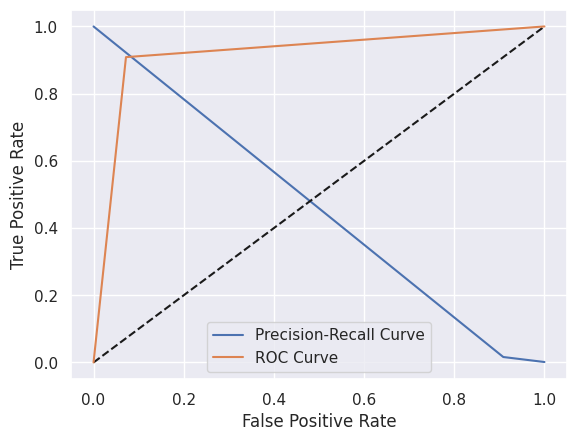

In [45]:
# Plot curves
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Using graph to visualize AUC-ROC, precision, recall, F1-score for Logistic Regression

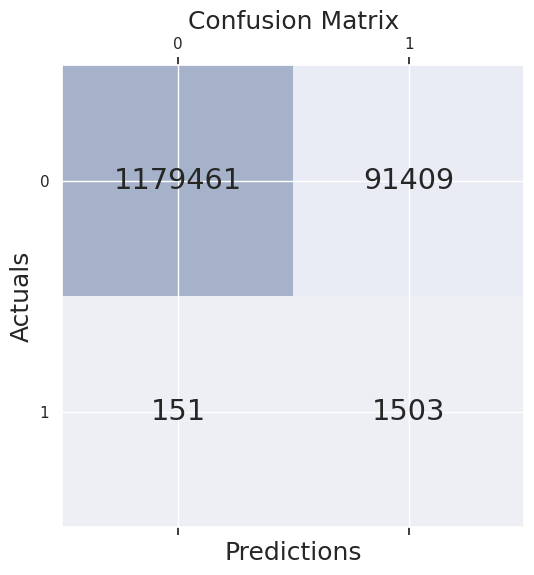

In [46]:
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Confusion matirx graph for Logistic Regression
